In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import random

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
path = '/content/gdrive/MyDrive/Dataset/CJ AI/'

In [3]:
march = pd.read_csv(path + 'march.csv', encoding = 'utf-8')
april = pd.read_csv(path + 'april.csv', encoding = 'utf-8')
may = pd.read_csv(path + 'may.csv', encoding = 'utf-8')
june = pd.read_csv(path + 'june.csv', encoding = 'utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = pd.concat((march, april, may, june), axis = 0)

In [ ]:
df

CORP_ID        REF_ORD_NO  ... CNEE_ADDR_1  CNEE_ADDR_2
0        KX007  2021030365922551  ...       서울특별시         서대문구
1        KX007  2021030365922951  ...        경상남도          김해시
2        KX007  2021030365924361  ...        경상남도          거제시
3        KX007  2021030365928921  ...       서울특별시          서초구
4        KX007  2021030365930451  ...         경기도          김포시
...        ...               ...  ...         ...          ...
676907   GP001      201806270001  ...         경기도          NaN
676908   GP001      201806270001  ...         경기도          NaN
676909   GP001      201806270001  ...         경기도          NaN
676910   GP001      201806270001  ...         경기도          NaN
676911   GP001      201806270001  ...         경기도          NaN

[1786374 rows x 32 columns]

세정특별자치시는 SHPR_ADDR_2 에도 세종특별자치시로 고정

CNEE2에서 충남공주시는 충청남도 / 공주시 로 교체, 경상남도는 제거

In [ ]:
df[df['SHPR_ADDR_1'] == '세종특별자치시']['SHPR_ADDR_2'] = '세종특별자치시'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df[df['SHPR_ADDR_1'] == '세종특별자치시']['SHPR_ADDR_2'].fillna('세종특별자치시')

0         세종특별자치시
7         세종특별자치시
21        세종특별자치시
24        세종특별자치시
84        세종특별자치시
           ...   
676884    세종특별자치시
676888    세종특별자치시
676889    세종특별자치시
676890    세종특별자치시
676893    세종특별자치시
Name: SHPR_ADDR_2, Length: 43563, dtype: object

In [ ]:
df['SHPR_CD'].value_counts()

In [5]:
columns = ['CORP_ID', 'BKG_DATE', 'SHPR_CD', 'ITEM_SEQ', 'ITEM_CD', 'ITEM_QTY', 'ITEM_AMT', 
           'BRAND_NM', 'POST_ZONE']
           # , 'SHPR_ADDR1', 'SHPR_ADDR1', 'CNEE_ADDR1', 'CNEE_ADDR1'
dataset = df[columns]
dataset = df.groupby(columns,as_index=False).sum()
dataset = dataset[columns]
dataset = dataset.dropna(axis = 0, how = 'any')

In [6]:
category_columns = ['SHPR_CD', 'BRAND_NM', 'CORP_ID', 'ITEM_CD']
for i in category_columns:
  L_encoder = LabelEncoder()
  L_encoder.fit(dataset[i].astype(str))
  dataset[i] = L_encoder.transform(dataset[i].astype(str))

In [ ]:
# columns = ['SHPR_CD', 'ITEM_CD', 'POST_ZONE', 'BRAND_NM']
# array = []
# for i in columns:
#   O_encoder = OneHotEncoder()
#   O_encoder.fit(np.array(dataset[i]).reshape(1, -1))
#   printpd.DataFrame(O_encoder.transform(np.array(dataset[i]).reshape(1, -1))))
#   # dataset = pd.concat((dataset, ), axis=1).drop(i, axis=1)

In [7]:
dataset['ITEM_AMT'] = np.sqrt(dataset['ITEM_AMT'])

In [ ]:
dataset

CORP_ID  BKG_DATE  SHPR_CD  ...    ITEM_AMT  BRAND_NM  POST_ZONE
0              0  20210529       15  ...  212.132034         1       18.0
1              0  20210530       16  ...  531.036722         1        7.0
2              0  20210531       12  ...  234.520788         0        6.0
3              0  20210531       12  ...  331.662479         0       41.0
4              0  20210531       12  ...  298.328678         0        6.0
...          ...       ...      ...  ...         ...       ...        ...
1328014        1  20210630       14  ...  141.421356         1       57.0
1328015        1  20210630       14  ...  126.491106         1       13.0
1328016        1  20210630       14  ...  126.491106         1       18.0
1328017        1  20210630       14  ...  126.491106         1       44.0
1328018        1  20210630       14  ...  137.840488         1        6.0

[1328019 rows x 9 columns]

In [8]:
# dataset['year'] = dataset['BKG_DATE'].astype(str).str[0:4].astype(int)
dataset['month'] = dataset['BKG_DATE'].astype(str).str[4:6].astype(int)
dataset['day'] = dataset['BKG_DATE'].astype(str).str[6:].astype(int)

In [9]:
dataset = dataset.drop(columns = 'BKG_DATE')
Y_total = dataset['ITEM_QTY']
Y_total = Y_total.astype('float64')

In [ ]:
Y_over = Y_total[Y_total > 1]
X_over = dataset[dataset['ITEM_QTY'] > 1].drop(columns = 'ITEM_QTY')
# X_over = 

In [10]:
X_total = dataset.drop(columns = 'ITEM_QTY')

In [ ]:
X_total = (X_total - np.mean(X_total)) / np.std(X_total)

In [11]:
# 데이터 분리. train - 0.64, valid - 0.16, test_public = 0.1, test_private = 0.1
X_train, X_test, Y_train, Y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=123)
# X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=123)
X_test_public, X_test_private, Y_test_public, Y_test_private = train_test_split(X_test, Y_test, test_size=0.5, random_state=123)

In [ ]:
# user_train, user_valid, user_test_private, user_test_public = X_train['ITEM_CD'], X_valid['ITEM_CD'], X_test_public['ITEM_CD'], X_test_private['ITEM_CD'],

In [ ]:
# X_train, X_valid, X_test_public, X_test_private = X_train.drop(columns = 'ITEM_CD'), X_valid.drop(columns = 'ITEM_CD'), X_test_public.drop(columns = 'ITEM_CD'), X_test_private.drop(columns = 'ITEM_CD')

In [ ]:
X_train

CORP_ID  SHPR_CD  ITEM_SEQ  ITEM_CD  ...  BRAND_NM  POST_ZONE  month  day
1179429        1        6         3     5171  ...         1        3.0      6   18
592384         1        7         1    11221  ...         0       14.0      4   29
1322172        1        7         1     3974  ...         1       37.0      6   30
321277         1        3         1     4380  ...         1       99.0      3   28
540922         1        0         2     4083  ...         1       31.0      4   24
...          ...      ...       ...      ...  ...       ...        ...    ...  ...
1241052        1       10         1    10035  ...         0       63.0      6   23
1066306        1        0         1    13204  ...         1       16.0      6   10
28030          0       16         1    14262  ...         1       58.0      6    8
277869         1        0         1     6294  ...         0       47.0      3   23
773630         1        0         1    12504  ...         1       16.0      5   18

[1062415 rows x 9 columns]

# Model part

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding,Dot,Add,Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD,Adamax
from tensorflow.keras.layers import Dense,Concatenate,Activation
from keras import backend as K

In [13]:
def RMSE(y_true,y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y_pred,y_true))))

In [14]:
def SMAPE(y_true, y_pred):
        return 100 * K.mean(abs(y_pred - y_true) / ((abs(y_pred) + abs(y_true)) * 2))

In [15]:
def MAPE(y_true, y_pred):
        return 100 * K.mean(abs((y_pred - y_true) / y_true))

In [16]:
def MAL(y_true, y_pred):
  return np.max(abs(y_true - y_pred))

In [17]:
def U_net_model(n_nodes = 128):
  inputs = Input(shape=(9,))

  UB1 = Dense(n_nodes, activation="rel")(inputs)
  UB2 = Dense(n_nodes * 2, activation="relu")(UB1)
  UB3 = Dense(n_nodes * 4, activation="relu")(UB2)
  UB4 = Dense(n_nodes * 8, activation="relu")(UB3)
  UB5 = Dense(n_nodes * 16, activation="relu")(UB4)

  DB5 = Dense(n_nodes * 16, activation="relu")(UB5)
  DB5 = Add()([DB5, UB5])
  DB4 = Dense(n_nodes * 8, activation="relu")(DB5)
  DB4 = Add()([DB4, UB4])
  DB3 = Dense(n_nodes * 4, activation="relu")(DB4)
  DB3 = Add()([DB3, UB3])
  DB2 = Dense(n_nodes * 2, activation="relu")(DB3)
  DB2 = Add()([DB2, UB2])
  DB1 = Dense(n_nodes * 1, activation="relu")(DB2)
  DB1 = Add()([DB1, UB1])

  outputs = Dense(1, activation="linear")(DB1)u
  model = Model(inputs, outputs)
  model.compile(loss='mae', optimizer='adam', metrics = [MAPE])
  return model
U_net_model = U_net_model()
U_net_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1280        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          33024       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 512)          131584      dense_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
dataset

CORP_ID   SHPR_CD  ITEM_SEQ  ITEM_CD  ...  BRAND_NM  POST_ZONE  month  day
0              0  90001702         1    14352  ...         1       18.0      5   29
1              0  90001703         1    14269  ...         1        7.0      5   30
2              0  90001664         1     1736  ...         0        6.0      5   31
3              0  90001664         1     1736  ...         0       41.0      5   31
4              0  90001664         1     1737  ...         0        6.0      5   31
...          ...       ...       ...      ...  ...       ...        ...    ...  ...
1328014        1  90001683         2     7286  ...         1       57.0      6   30
1328015        1  90001683         2    10483  ...         1       13.0      6   30
1328016        1  90001683         2    10483  ...         1       18.0      6   30
1328017        1  90001683         2    14030  ...         1       44.0      6   30
1328018        1  90001683         2    14049  ...         1        6.0      6   30

[1328019 rows x 10 columns]

In [18]:
# Index(['CORP_ID', 'SHPR_CD', 'ITEM_SEQ', 'ITEM_CD', 'ITEM_AMT', 'BRAND_NM',
#        'POST_ZONE', 'month', 'day'])

C = dataset.CORP_ID.max()+1
S = dataset.SHPR_CD.max()+1
IS = dataset.ITEM_SEQ.max()+1
I = dataset.ITEM_CD.max()+1
IA = int(dataset.ITEM_AMT.max())+1
BN = int(dataset.BRAND_NM.max()) + 1
P = int(dataset.POST_ZONE.max())+1
M = dataset.month.max()+1
D = dataset.day.max()+1

In [ ]:
S

24

In [19]:
corp = Input(shape = (1,))
brand = Input(shape = (1,))
itemcd = Input(shape=(1,))
shpr = Input(shape=(1,))
post = Input(shape=(1,))
itemseq = Input(shape=(1,))
itemamt = Input(shape=(1,))
month = Input(shape=(1,))
day = Input(shape=(1,))

K = 150

C_embedding = Embedding(C,K,embeddings_regularizer=l2())(corp)
BN_embedding = Embedding(BN,K,embeddings_regularizer=l2())(brand)
I_embedding = Embedding(I,K,embeddings_regularizer=l2())(itemcd)
S_embedding = Embedding(S,K,embeddings_regularizer=l2())(shpr)
P_embedding = Embedding(P,K,embeddings_regularizer=l2())(post)
IS_embedding = Embedding(IS,K,embeddings_regularizer=l2())(itemseq)
IA_embedding = Embedding(IA,K,embeddings_regularizer=l2())(itemamt) 
M_embedding = Embedding(M,K,embeddings_regularizer=l2())(month)
D_embedding = Embedding(D,K,embeddings_regularizer=l2())(day)



#아래 부분은 경향성 부분인데, 아직 안보이니 pass

IA_bias = Embedding(IA,1,embeddings_regularizer=l2())(itemamt)
IS_bias = Embedding(IS,1,embeddings_regularizer=l2())(itemseq)

#user_bias = Embedding(U.max()+1,1,embeddings_regularizer=l2())(user) #user를 특정 할 수 있는 정보가 있을 때 사용
#sex_bias = Embedding(S,1,embeddings_regularizer=l2())(sex)
#age_bias = Embedding(A,1,embeddings_regularizer=l2())(age)
#hj_bias = Embedding(H,1,embeddings_regularizer=l2())(hj)
#item_bias = Embedding(I,1,embeddings_regularizer=l2())(item_buz)

from tensorflow.keras.layers import Dense,Concatenate,Activation


C_embedding = Flatten()(C_embedding)
BN_embedding = Flatten()(BN_embedding)
I_embedding = Flatten()(I_embedding)
S_embedding = Flatten()(S_embedding)
P_embedding = Flatten()(P_embedding)
IS_embedding = Flatten()(IS_embedding)
IA_embedding = Flatten()(IA_embedding)
M_embedding = Flatten()(M_embedding)
D_embedding = Flatten()(D_embedding)

IA_bias = Flatten()(IA_bias)
IS_bias = Flatten()(IS_bias)
#user_bias = Flatten()(user_bias)
#sex_bias = Flatten()(sex_bias)
#age_bias = Flatten()(age_bias)
#hj_bias = Flatten()(hj_bias)
#item_bias = Flatten()(item_bias)


#user_bias 와 U_embedding을 user를 특정 할 수 있는 정보가 있다면 추가하면 좋다. => 더 높은 정확성과, 적은 오류를 가질 것이다.
R = Concatenate()([C_embedding, BN_embedding, I_embedding, S_embedding, P_embedding, IS_embedding,
                   IA_embedding, M_embedding, D_embedding, IA_bias, IS_bias])

n_nodes = 256

UB1 = Dense(n_nodes, activation="relu")(R)
UB2 = Dense(n_nodes * 2, activation="relu")(UB1)
UB3 = Dense(n_nodes * 4, activation="relu")(UB2)
UB4 = Dense(n_nodes * 8, activation="relu")(UB3)
UB5 = Dense(n_nodes * 16, activation="relu")(UB4)

DB5 = Dense(n_nodes * 16, activation="relu")(UB5)
DB5 = Add()([DB5, UB5])
DB4 = Dense(n_nodes * 8, activation="relu")(DB5)
DB4 = Add()([DB4, UB4])
DB3 = Dense(n_nodes * 4, activation="relu")(DB4)
DB3 = Add()([DB3, UB3])
DB2 = Dense(n_nodes * 2, activation="relu")(DB3)
DB2 = Add()([DB2, UB2])
DB1 = Dense(n_nodes * 1, activation="relu")(DB2)
DB1 = Add()([DB1, UB1])

outputs = Dense(1, activation="linear")(DB1)
model = Model(inputs=[corp, brand, itemcd,shpr,post,itemseq,itemamt,month,day],outputs= outputs)
model.compile(
    loss = RMSE,
    optimizer = 'Adam',
    metrics = [RMSE]
)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 1)]          0                                            
____________________________________________________________________________________________

In [ ]:
def Embedding_MLP(n_nodes = 128):
  inputs = Input(shape=(9,))

  UB1 = Dense(n_nodes, activation="relu")(inputs)
  UB2 = Dense(n_nodes * 2, activation="relu")(UB1)
  UB3 = Dense(n_nodes * 4, activation="relu")(UB2)
  UB4 = Dense(n_nodes * 8, activation="relu")(UB3)
  UB5 = Dense(n_nodes * 16, activation="relu")(UB4)

  DB5 = Dense(n_nodes * 16, activation="relu")(UB5)
  DB5 = Add()([DB5, UB5])
  DB4 = Dense(n_nodes * 8, activation="relu")(DB5)
  DB4 = Add()([DB4, UB4])
  DB3 = Dense(n_nodes * 4, activation="relu")(DB4)
  DB3 = Add()([DB3, UB3])
  DB2 = Dense(n_nodes * 2, activation="relu")(DB3)
  DB2 = Add()([DB2, UB2])
  DB1 = Dense(n_nodes * 1, activation="relu")(DB2)
  DB1 = Add()([DB1, UB1])

  outputs = Dense(1, activation="linear")(DB1)
  model = Model(inputs, outputs)
  model.compile(loss='mae', optimizer='adam', metrics = [MAPE])
  return model
# U_net_model = U_net_model()
# U_net_model.summary()

In [ ]:
def model(n_nodes = 256):
  inputs = Input(shape=(9,))
  layer_1 = Dense(n_nodes, activation="relu")(inputs)

  layer_2 = Dense(n_nodes, activation="relu")(layer_1)
  layer_2 = Add()([layer_2, layer_1])

  layer_3 = Dense(n_nodes, activation="relu")(layer_2)
  layer_3 = Add()([layer_3, layer_2, layer_1])

  layer_4 = Dense(n_nodes, activation="relu")(layer_3)
  layer_4 = Add()([layer_4, layer_3, layer_2, layer_1])

  outputs = Dense(1, activation="linear")(layer_4)
  model = Model(inputs, outputs)
  model.compile(loss='mae', optimizer='adam', metrics = [RMSE])
  return model
model = model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 256)          2560        input_2[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 256)          65792       dense_11[0][0]                   
__________________________________________________________________________________________________
add_5 (Add)                     (None, 256)          0           dense_12[0][0]                   
                                                                 dense_11[0][0]             

In [ ]:
X_valid

CORP_ID   SHPR_CD  ITEM_SEQ  ITEM_CD  ...  BRAND_NM  POST_ZONE  month  day
1171078        1  90001622         2    12883  ...         0       11.0      6   17
1306357        1  90001441         1     3718  ...         1       21.0      6   29
1297811        1  90001582         1     4861  ...         1       58.0      6   28
885959         1  90001341         1     9859  ...         0       42.0      5   28
956087         1  90001341         3     5799  ...         0       13.0      6    2
...          ...       ...       ...      ...  ...       ...        ...    ...  ...
32024          0  90001703         1    14253  ...         1       17.0      6    9
401354         1  90001443         1     6810  ...         1        1.0      4    7
381482         1  90001441         2     4394  ...         1        4.0      4    5
380308         1  90001441         1     4393  ...         1       16.0      4    5
116956         0  90001776         1     2467  ...         0       52.0      6   30

[212483 rows x 9 columns]

In [ ]:
# [X_valid.CORP_ID. X_valid.BRAMD_NM, X_valid.ITEM_CD, X_valid.SHPR_CD, X_valid.POST_ZONE, X_valid.ITEM_SEQ, X_valid.ITEM_AMT, X_valid.month, X_valid.day]

In [20]:
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath = '/content/gdrive/MyDrive/Dataset/CJ AI/rmse_9features.h5',
        monitor = 'val_loss',
        save_best_only=True
    )]

In [21]:
model.fit(x = (X_train.CORP_ID, X_train.BRAND_NM, X_train.ITEM_CD,X_train.SHPR_CD,X_train.POST_ZONE,X_train.ITEM_SEQ,X_train.ITEM_AMT,X_train.month,X_train.day),
          y = Y_train,
          validation_split = 0.2,
          batch_size = 2048,
          shuffle = True,
          epochs = 100,
          callbacks = callbacks_list)

Epoch 1/100
416/416 [==============================] - 23s 47ms/step - loss: 2.4007 - RMSE: 1.4950 - val_loss: 1.3177 - val_RMSE: 1.1164


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
416/416 [==============================] - 19s 46ms/step - loss: 1.6102 - RMSE: 1.3932 - val_loss: 1.2847 - val_RMSE: 1.0545
Epoch 3/100
416/416 [==============================] - 19s 46ms/step - loss: 1.3310 - RMSE: 1.0916 - val_loss: 1.2264 - val_RMSE: 0.9693
Epoch 4/100
416/416 [==============================] - 19s 46ms/step - loss: 1.2529 - RMSE: 0.9892 - val_loss: 1.1232 - val_RMSE: 0.8485
Epoch 5/100
416/416 [==============================] - 19s 46ms/step - loss: 1.2457 - RMSE: 0.9651 - val_loss: 1.1682 - val_RMSE: 0.8883
Epoch 6/100
416/416 [==============================] - 19s 46ms/step - loss: 1.5631 - RMSE: 1.2846 - val_loss: 1.5841 - val_RMSE: 1.3134
Epoch 7/100
416/416 [==============================] - 19s 46ms/step - loss: 1.1281 - RMSE: 0.8629 - val_loss: 1.1483 - val_RMSE: 0.8989
Epoch 8/100
416/416 [==============================] - 19s 46ms/step - loss: 1.0043 - RMSE: 0.7555 - val_loss: 1.0539 - val_RMSE: 0.8176
Epoch 9/100
416/416 [====================

loss - mae, metrics = mape

112/112 [==============================] - 6s 52ms/step - loss: 0.1429 - MAPE:  8464 - val_loss: 0.1500 - val_MAPE: 4.9451

# Model Evaluation

In [22]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Dataset/CJ AI/rmse_9features.h5', 
                                   custom_objects = {'RMSE': RMSE})

In [23]:
predict_public = model.predict(x = [X_test_public.CORP_ID, X_test_public.BRAND_NM, X_test_public.ITEM_CD,
                                    X_test_public.SHPR_CD, X_test_public.POST_ZONE, X_test_public.ITEM_SEQ,
                                    X_test_public.ITEM_AMT, X_test_public.month, X_test_public.day])

In [81]:
predict_private = model.predict(x = [X_test_private.CORP_ID, X_test_private.BRAND_NM, X_test_private.ITEM_CD,
                                    X_test_private.SHPR_CD, X_test_private.POST_ZONE, X_test_private.ITEM_SEQ,
                                    X_test_private.ITEM_AMT, X_test_private.month, X_test_private.day])

In [83]:
predict_public = pd.DataFrame(predict_public)
predict_private = pd.DataFrame(predict_private)

In [84]:
predict_public = round(predict_public)
predict_private = round(predict_private)

In [85]:
Y_test_public = Y_test_public.reset_index(drop=True)
Y_test_public = pd.DataFrame(Y_test_public)
Y_test_private = Y_test_private.reset_index(drop=True)
Y_test_private = pd.DataFrame(Y_test_private)

In [71]:
Y_test_public = pd.DataFrame(Y_test_public)
Y_test_private = pd.DataFrame(Y_test_private)

In [86]:
new_public = pd.concat((predict_public, Y_test_public), axis = 1, ignore_index = True, join='inner')
new_private = pd.concat((predict_private, Y_test_private), axis = 1, ignore_index = True, join='inner')

In [90]:
print(len(new_public[new_public[0] == new_public[1]]) / len(new_public[0]))
print(len(new_private[new_private[0] == new_private[1]]) / len(new_private[0]))

0.9668980888842036
0.9668604388488126


In [ ]:
print(len(new_public[new_public[0] == new_public[1] & ]) / len(new_public[0]))
print(len(new_private[new_private[0] == new_private[1]]) / len(new_private[0]))

In [52]:
len(predict_public[predict_public[0] == 1])

110744

In [43]:
sum_1_predict = 0
sum_1_test = 0
sum_predict = 0
sum_test = 0
one_notone = 0
not1_1 = 0
one_one = 0
n1_n1 = 0

for i in range(len(predict_public)):
  if predict_public[i] == 1:
    sum_1_predict += 1
  else:
    sum_predict += 1
  if Y_test_public[i] == 1:
    sum_1_test += 1
  else:
    sum_test += 1
  if predict_public[i] == Y_test_public[i] and Y_test_public[i] == 1:
    one_one += 1
  elif predict_public[i] == Y_test_public[i] and Y_test_public[i] != 1:
    n1_n1 += 1
  elif predict_public[i] != Y_test_public[i] and Y_test_public[i] == 1:
    not1_1 ++ 1
  else:
    one_notone += 1

ValueError: ignored

In [27]:
predict_public.to_csv('/content/gdrive/MyDrive/Dataset/CJ AI/predict.csv', index = False)
Y_test_public.to_csv('/content/gdrive/MyDrive/Dataset/CJ AI/realdata.csv', index = False)

In [ ]:
diff = predict_public - Y_test_public

In [ ]:
predict_unet_private = pd.DataFrame(predict_unet_private )

In [ ]:
predict_unet_private.tail(50)

0
174392   0.995397
174393   1.004233
174394   0.998409
174395   0.993776
174396   0.998249
174397   0.996182
174398   0.989635
174399   0.996154
174400   1.002500
174401   0.996073
174402   0.999111
174403   0.993473
174404   0.998012
174405   0.991408
174406   0.995562
174407   0.996171
174408   1.001079
174409   0.994058
174410   1.000199
174411   0.999766
174412   0.995814
174413   0.996384
174414   0.999761
174415   0.994706
174416   1.000690
174417   2.013689
174418   0.992789
174419   0.994255
174420   0.994169
174421  14.581859
174422   0.994978
174423   0.999465
174424   0.992216
174425   0.992390
174426   0.999008
174427   0.993421
174428   1.004978
174429   1.002437
174430   2.063132
174431   1.000124
174432   0.996256
174433   0.992792
174434   1.003370
174435   1.002153
174436   0.990376
174437   0.998887
174438   0.996996
174439   0.998376
174440   0.993212
174441   0.995880

In [ ]:
pd.DataFrame(Y_test_private).tail(30)

ITEM_QTY
268968       1.0
457782       1.0
6866         1.0
255932       1.0
494040       1.0
191020       2.0
256727       1.0
241242       1.0
275190       1.0
303288      20.0
151986       1.0
201393       1.0
147476       1.0
246923       1.0
323234       1.0
182359       1.0
660953       1.0
307695       1.0
353924       2.0
126469       1.0
520117       1.0
105635       1.0
232290       1.0
217886       1.0
105353       1.0
463209       1.0
160935       1.0
122546       1.0
44179        1.0
257194       5.0

In [ ]:
abs(predict_unet_private - Y_test_private)

# 3월 EDA

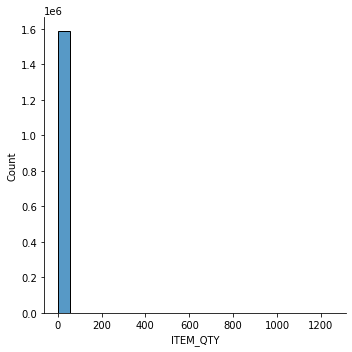

In [ ]:
sns.displot(df['ITEM_QTY'])

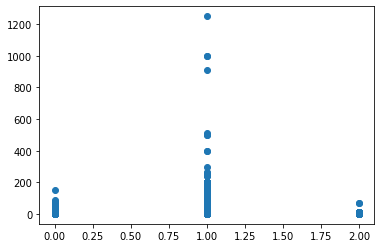

1    1245690
0     333256
2       6578
Name: BRAND_NM, dtype: int64


In [ ]:
plt.plot(df['BRAND_NM'], df['ITEM_QTY'], 'o')
plt.show()
print(df['BRAND_NM'].value_counts()) # 적어도 3월엔 3개의 종류의 상품만 존재함.

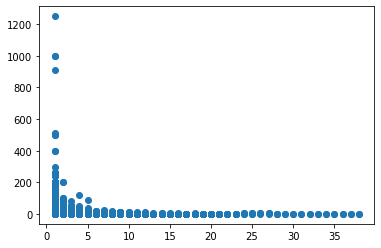

In [ ]:
plt.plot(df['ITEM_SEQ'], df['ITEM_QTY'], 'o')
plt.show()
# 시퀀스 값에 따라서 현저히 감소하는 추세를 확인할 수 있음!

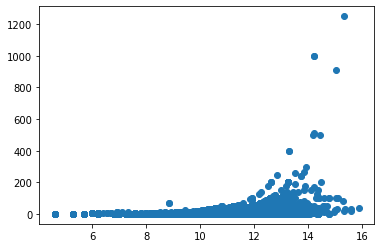

In [ ]:
plt.plot(np.log(df['ITEM_AMT']), df['ITEM_QTY'], 'o')
plt.show()
# 가격 스케일이 커서 로그를 씌우고 실행시킴.
# 전반적으로 가격이 커질수록 배송할 제품의 양이 커지는 효과를 볼 수 있음.
 

In [ ]:
df['SHPR_CD'].value_counts()

90001302    96484
90001542    47141
90001341    39549
90001541    32932
90001441    30209
90001443    21819
90001521     8802
90001381     2739
90001582      176
Name: SHPR_CD, dtype: int64

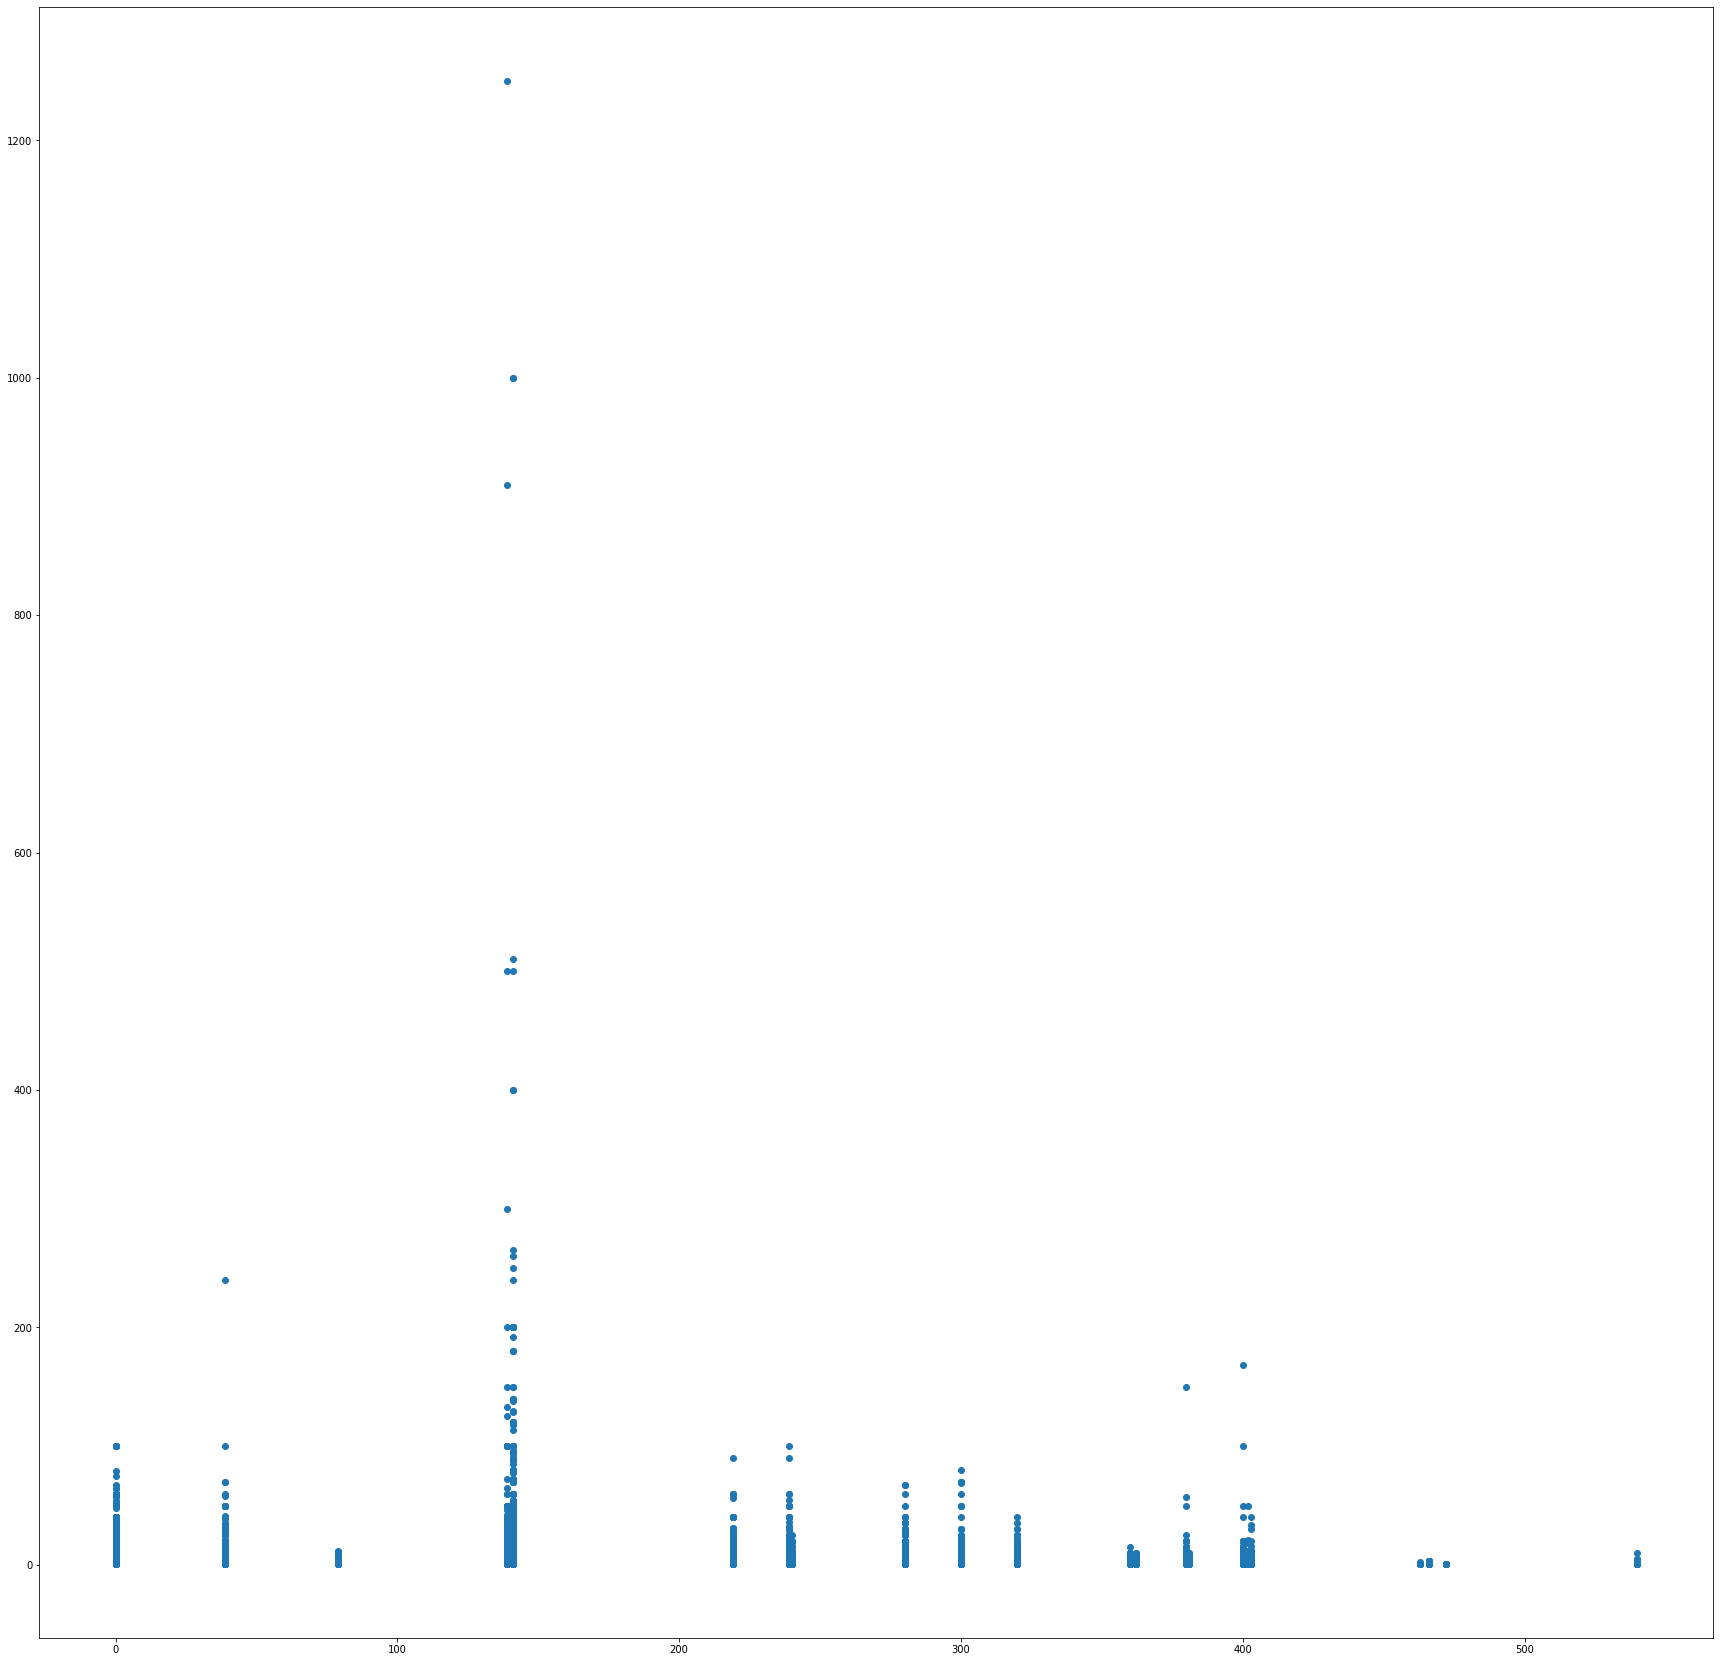

In [ ]:
k = df['SHPR_CD'] - df['SHPR_CD'].min()
plt.figure(figsize = (30,30))
plt.plot(k, df['ITEM_QTY'], 'o')
# 고객사 코드를 통한 eda, 확실히 고객사 별로 데이터 수도 다르고 분포 또한 다름을 알 수 있음. 
# 특히 특정 고객사의 주문량이 폭주하는 모습을 볼 수 있다. 

In [ ]:
march['ITEM_CD'].value_counts() # 주문 코드가 동일한 주문이 많다? 한번에 배송을 하는 것을 의미하는 걸까?

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

In [ ]:
L_encoder = LabelEncoder()
L_encoder.fit(df['ITEM_CD'])
df['ITEM_CD'] = L_encoder.transform(df['ITEM_CD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
march['ITEM_CD'].value_counts()

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

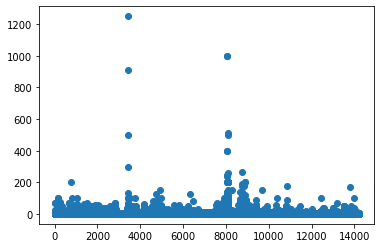

In [ ]:
plt.plot(df['ITEM_CD'], df['ITEM_QTY'], 'o')
# 주문코드 별로 분포가 상이하게 다른? 모습을 볼 수 있다. 좀 더 자세히 볼 필요가 있을것 같다.

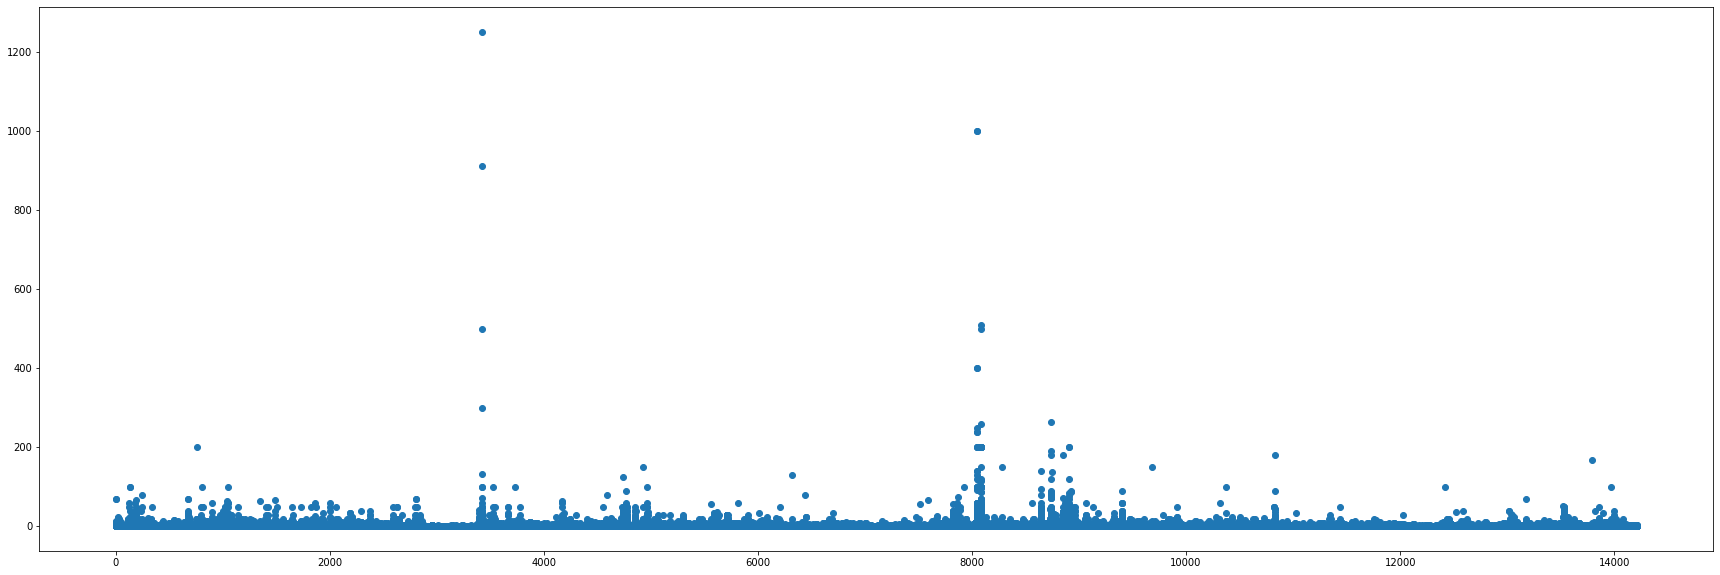

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(df['ITEM_CD'], df['ITEM_QTY'], 'o')
# 주문 코드별 수량을 봤는데, 특정 주문 코드에서 주문이 폭발적으로 증가.
# 아마도 고객사와 연계하면 더 좋게 될지도? 
# 하지만 주문코드는 주문할 때마다 달라지지 않을까? 그러면 의미가 퇴색될 가능성이 높아질 것이다.

groupby 를 써서 휴일 / 평일 나눠서 eda를 해봅시다!

In [ ]:
df['BKG_DATE'].value_counts().head(10) # 적어도 3월엔 3개의 종류의 상품만 존재함.

20210517    34566
20210608    33511
20210613    33060
20210420    29564
20210323    29299
20210607    29253
20210628    24813
20210531    24032
20210516    22767
20210617    22129
Name: BKG_DATE, dtype: int64

In [ ]:
df['BKG_DATE'].astype(str).str[6:].astype(int)

1          3
2          3
3          3
4          3
5          3
          ..
676881    30
676885    29
676886    30
676887    30
676892    29
Name: BKG_DATE, Length: 1585524, dtype: int64

In [ ]:
df['year'] = df['BKG_DATE'].astype(str).str[0:4].astype(int)
df['month'] = df['BKG_DATE'].astype(str).str[4:6].astype(int)
df['day'] = df['BKG_DATE'].astype(str).str[6:].astype(int)

In [ ]:
df['weekend'] = df['day'].apply(lambda x : 1 if x % 7 == 6 else (1 if x % 7 == 0 else 0))

In [ ]:
df['holiday'] = df['day'].apply(lambda x : 1 if x == 1 else 0)

In [ ]:
df

CORP_ID        REF_ORD_NO             BKG_NO  ...  day  weekend  holiday
0        KX007  2021030365922551  KX007210303370934  ...    3        0        0
1        KX007  2021030365922951  KX007210303371080  ...    3        0        0
2        KX007  2021030365924361  KX007210303371081  ...    3        0        0
3        KX007  2021030365928921  KX007210303371205  ...    3        0        0
4        KX007  2021030365930451  KX007210303370967  ...    3        0        0
...        ...               ...                ...  ...  ...      ...      ...
676907   GP001      201806270001  GP001210628546912  ...   28        1        0
676908   GP001      201806270001  GP001210628546912  ...   28        1        0
676909   GP001      201806270001  GP001210628546912  ...   28        1        0
676910   GP001      201806270001  GP001210628546912  ...   28        1        0
676911   GP001      201806270001  GP001210628546912  ...   28        1        0

[1786374 rows x 37 columns]

In [ ]:
print(df['weekend'].value_counts())
print(df['holiday'].value_counts())

0    1311876
1     474498
Name: weekend, dtype: int64
0    1738744
1      47630
Name: holiday, dtype: int64


KeyError: ignored

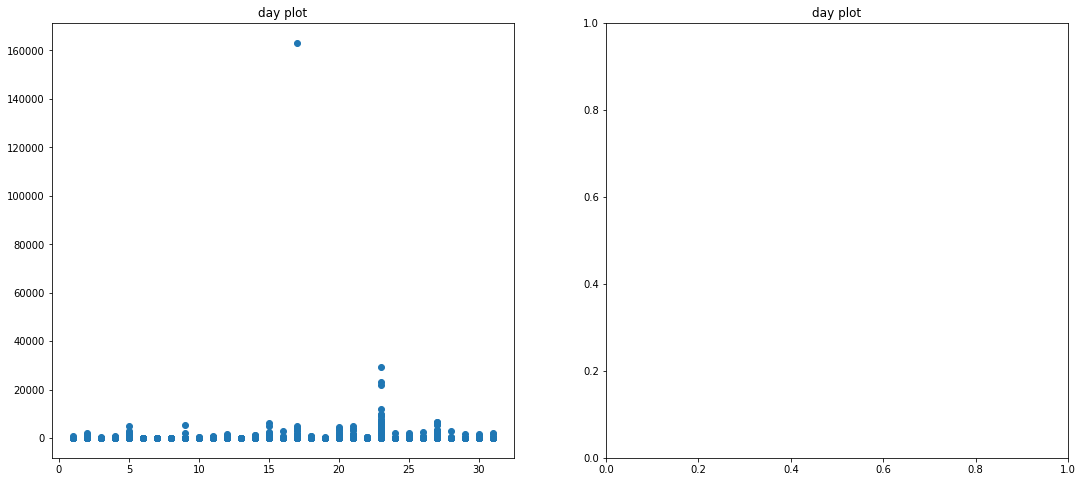

In [ ]:
plt.figure(figsize = (48,8))
plt.subplot(1,5,1)
plt.title('day plot')
plt.plot(df['day'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,2)
plt.title('day plot')
plt.plot(df['weekend'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,3)
plt.title('holiday plot')
plt.plot(df['holiday'], df['ITEM_QTY'], 'o')

In [ ]:
march.groupby('weekend').mean()

BKG_TYP      BKG_DATE      BKG_TIME  ...  3rd_week  4th_week  last_week
weekend                                       ...                               
0            7.0  2.021032e+07  94234.035997  ...  0.155674  0.337936   0.206335
1            7.0  2.021032e+07  97023.010843  ...  0.246963  0.294515   0.294515

[2 rows x 29 columns]

In [ ]:
df['monday'] = df['day'].apply(lambda x : 1 if x % 7 == 1 else 0)
df['tuesday'] = df['day'].apply(lambda x : 1 if x % 7 == 2 else 0)
march['wednesday'] = march['day'].apply(lambda x : 1 if x % 7 == 3 else 0)
march['thursday'] = march['day'].apply(lambda x : 1 if x % 7 == 4 else 0)
march['friday'] = march['day'].apply(lambda x : 1 if x % 7 == 5 else 0)
march['saturday'] = march['day'].apply(lambda x : 1 if x % 7 == 6 else 0)
march['sunday'] = march['day'].apply(lambda x : 1 if x % 7 == 0 else 0)

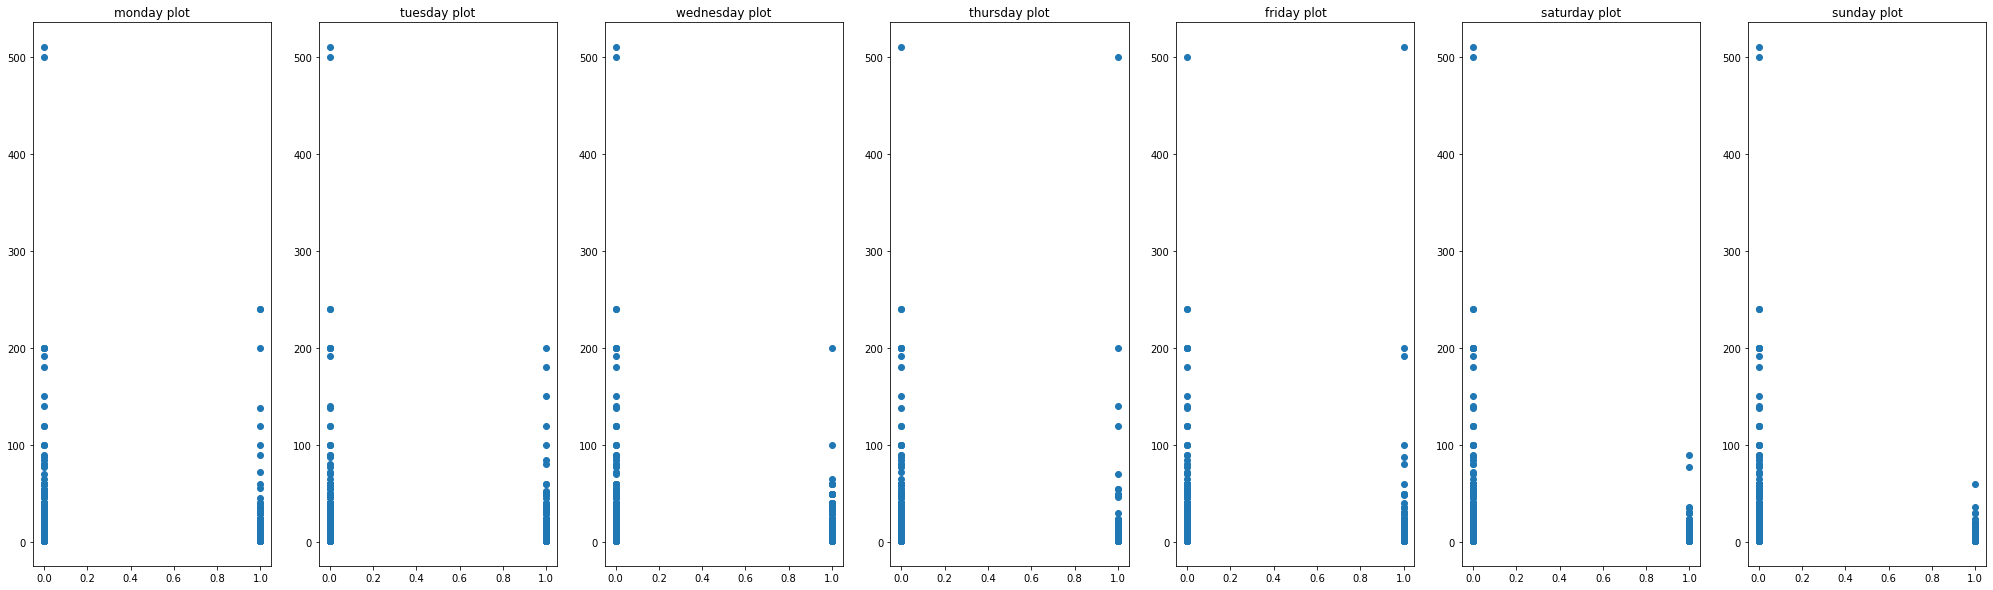

In [ ]:
plt.figure(figsize = (35,10))
plt.subplot(1,7,1)
plt.title('monday plot')
plt.plot(march['monday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,2)
plt.title('tuesday plot')
plt.plot(march['tuesday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,3)
plt.title('wednesday plot')
plt.plot(march['wednesday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,4)
plt.title('thursday plot')
plt.plot(march['thursday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,5)
plt.title('friday plot')
plt.plot(march['friday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,6)
plt.title('saturday plot')
plt.plot(march['saturday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,7)
plt.title('sunday plot')
plt.plot(march['sunday'], march['ITEM_QTY'], 'o')

In [ ]:
df['1st_week'] = df['day'].apply(lambda x : 1 if x <= 7 else 0)
df['2nd_week'] = df['day'].apply(lambda x : 1 if 8 <= x <= 14 else 0)
df['3rd_week'] = df['day'].apply(lambda x : 1 if 15 <= x <= 21 else 0)
df['4th_week'] = df['day'].apply(lambda x : 1 if 22 <= x <= 28 else 0)
df['last_week'] = df['day'].apply(lambda x : 1 if x >= 25 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

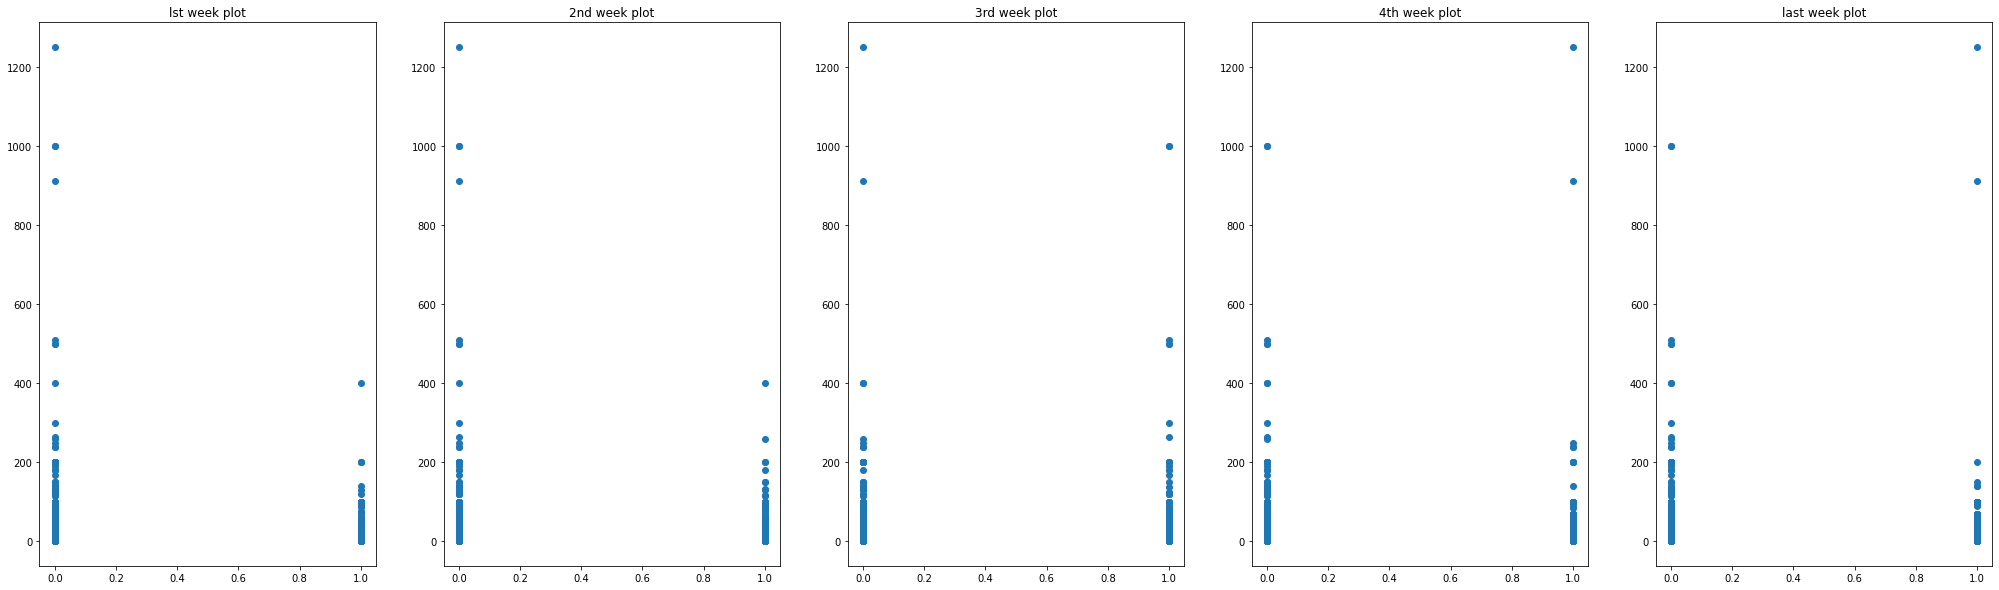

In [ ]:
plt.figure(figsize = (35,10))
plt.subplot(1,5,1)
plt.title('lst week plot')
plt.plot(df['1st_week'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,2)
plt.title('2nd week plot')
plt.plot(df['2nd_week'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,3)
plt.title('3rd week plot')
plt.plot(df['3rd_week'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,4)
plt.title('4th week plot')
plt.plot(df['4th_week'], df['ITEM_QTY'], 'o')
plt.subplot(1,5,5)
plt.title('last week plot')
plt.plot(df['last_week'], df['ITEM_QTY'], 'o')

In [ ]:
Y_test_private

608810    1
292206    1
219571    4
174970    1
139648    1
         ..
463209    1
160935    1
122546    1
44179     1
257194    5
Name: ITEM_QTY, Length: 174442, dtype: int64

In [ ]:
predict = model.predict(X_test_private)

In [ ]:
RMSE(predict, Y_test_pr)

(174442, 1)

In [ ]:
# hj = Input(shape=(1,))
# sex = Input(shape=(1,))
# age = Input(shape=(1,))
# item_buz = Input(shape=(1,))

# K = 200

# #U_embedding = Embedding(2000,K,embeddings_regularizer=l2())(unit) #user를 특정 할 수 있는 정보가 있을 때 사용
# H_embedding = Embedding(H,K,embeddings_regularizer=l2())(hj)
# S_embedding = Embedding(S,K,embeddings_regularizer=l2())(sex)
# A_embedding = Embedding(A,K,embeddings_regularizer=l2())(age)
# I_embedding = Embedding(I,K,embeddings_regularizer=l2())(item_buz)

# #user_bias = Embedding(U.max()+1,1,embeddings_regularizer=l2())(user) #user를 특정 할 수 있는 정보가 있을 때 사용
# sex_bias = Embedding(S,1,embeddings_regularizer=l2())(sex)
# age_bias = Embedding(A,1,embeddings_regularizer=l2())(age)
# hj_bias = Embedding(H,1,embeddings_regularizer=l2())(hj)
# item_bias = Embedding(I,1,embeddings_regularizer=l2())(item_buz)
# from tensorflow.keras.layers import Dense,Concatenate,Activation

# #U_embedding = Flatten()(U_embedding)
# H_embedding = Flatten()(H_embedding)
# S_embedding = Flatten()(S_embedding)
# A_embedding = Flatten()(A_embedding)
# I_embedding = Flatten()(I_embedding)

# #user_bias = Flatten()(user_bias)
# sex_bias = Flatten()(sex_bias)
# age_bias = Flatten()(age_bias)
# hj_bias = Flatten()(hj_bias)
# item_bias = Flatten()(item_bias)

# #user_bias 와 U_embedding을 user를 특정 할 수 있는 정보가 있다면 추가하면 좋다. => 더 높은 정확성과, 적은 오류를 가질 것이다.
# R = Concatenate()([S_embedding,A_embedding,H_embedding,I_embedding,sex_bias,age_bias,hj_bias,item_bias])

# R = Dense(2048)(R)
# R = Activation('relu')(R)
# R = Dense(256)(R)
# R = Activation('relu')(R)
# R = Dense(1)(R) #소비 점수를 output으로 가져온다(정확한 평가 지표가 있었다면, 조금 더 좋았을 것)

# model = Model(inputs=[sex,age,hj,item_buz],outputs=R)
# model.compile(
#     loss = RMSE,
#     optimizer = 'Adam',
#     metrics = [RMSE]
# )

# model.summary()

# 3월 EDA

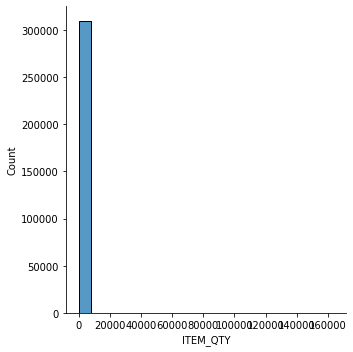

In [ ]:
sns.displot(march['ITEM_QTY'])

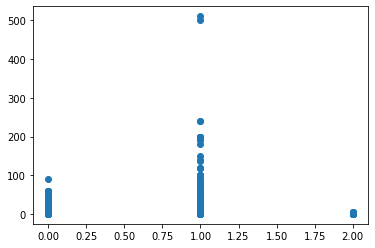

1    231851
0     47417
2       583
Name: BRAND_NM, dtype: int64


In [ ]:
plt.plot(march['BRAND_NM'], march['ITEM_QTY'], 'o')
plt.show()
print(march['BRAND_NM'].value_counts()) # 적어도 3월엔 3개의 종류의 상품만 존재함.

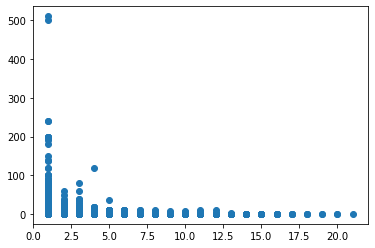

1     218001
2      36433
3      14233
4       6026
5       2435
6       1234
7        734
8        395
9        141
10        76
11        49
12        33
13        22
14        12
15         9
16         6
17         4
18         3
20         2
19         2
21         1
Name: ITEM_SEQ, dtype: int64


In [ ]:
plt.plot(march['ITEM_SEQ'], march['ITEM_QTY'], 'o')
plt.show()
print(march['ITEM_SEQ'].value_counts())
# 시퀀스 값에 따라서 현저히 감소하는 추세를 확인할 수 있음!

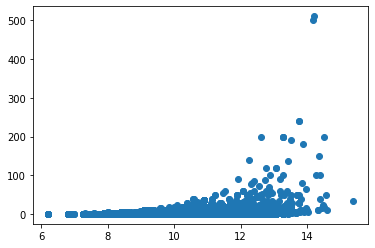

In [ ]:
plt.plot(np.log(march['ITEM_AMT']), march['ITEM_QTY'], 'o')
plt.show()
# 가격 스케일이 커서 로그를 씌우고 실행시킴.
# 전반적으로 가격이 커질수록 배송할 제품의 양이 커지는 효과를 볼 수 있음.
 

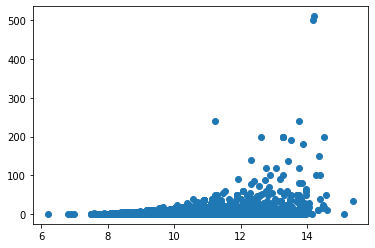

In [ ]:
plt.plot(np.log(march['INV_AMT']), march['ITEM_QTY'], 'o')
plt.show()

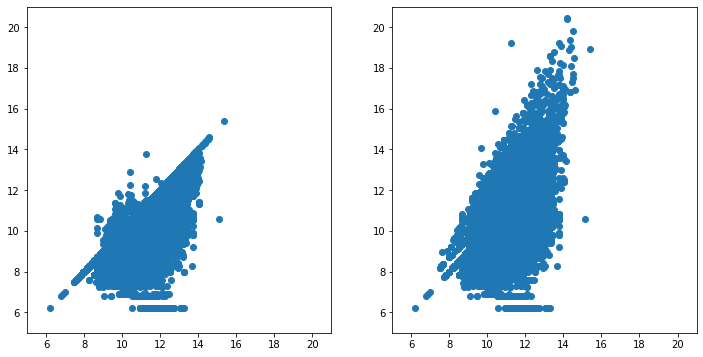

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.subplot(1,2,2)
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT'] * march['ITEM_QTY']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.show()
plt.show()
# 혹시 몰라서 주문 금액과 품목 금액에 대한 EDA를 해봤는데, 대략적으로 품목 금액은 주문 금액과 비례하는 성질을 가짐.
# 그리고 혹시나 해서 품목금액과 수량의 곱을 적용해 보았지만, 기존의 것이 더 설득력있는 분석임을 확인함.
# 그런데 주문금액과 품목 금액간 차이가 나는 이유는? 대체적으로 주문금액 > 품목금액이지만, 그렇지 않은 케이스도 존재함.

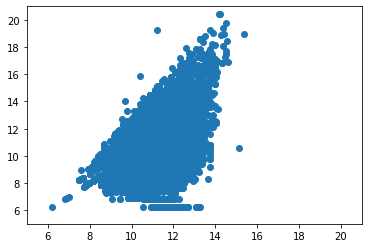

In [ ]:
plt.plot(np.log(march['INV_AMT']), np.log(march['ITEM_AMT'] * march['ITEM_QTY']), 'o')
plt.xlim(5, 21)
plt.ylim(5, 21)
plt.show()
# 혹시 몰라서 주문 금액과 품목 금액에 대한 EDA를 해봤는데, 대략적으로 

In [ ]:
march['SHPR_CD'].value_counts()

90001302    96484
90001542    47141
90001341    39549
90001541    32932
90001441    30209
90001443    21819
90001521     8802
90001381     2739
90001582      176
Name: SHPR_CD, dtype: int64

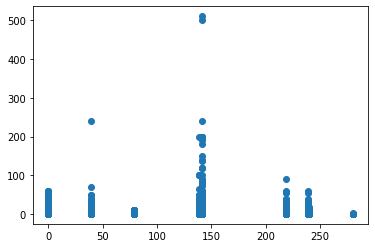

In [ ]:
k = march['SHPR_CD'] - march['SHPR_CD'].min()
plt.plot(k, march['ITEM_QTY'], 'o')
# 고객사 코드를 통한 eda, 확실히 고객사 별로 데이터 수도 다르고 분포 또한 다름을 알 수 있음. 
# 특히 특정 고객사의 주문량이 폭주하는 모습을 볼 수 있다. 

In [ ]:
march['ITEM_CD'].value_counts() # 주문 코드가 동일한 주문이 많다? 한번에 배송을 하는 것을 의미하는 걸까?

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

In [ ]:
L_encoder = LabelEncoder()
L_encoder.fit(march['ITEM_CD'])
march['ITEM_CD'] = L_encoder.transform(march['ITEM_CD'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
march['ITEM_CD'].value_counts()

1486    9688
1223    3479
1224    3281
4692    2833
4826    2833
        ... 
2864       1
817        1
4046       1
3534       1
0          1
Name: ITEM_CD, Length: 5320, dtype: int64

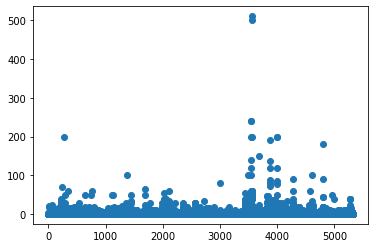

In [ ]:
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
# 주문코드 별로 분포가 상이하게 다른? 모습을 볼 수 있다. 좀 더 자세히 볼 필요가 있을것 같다.

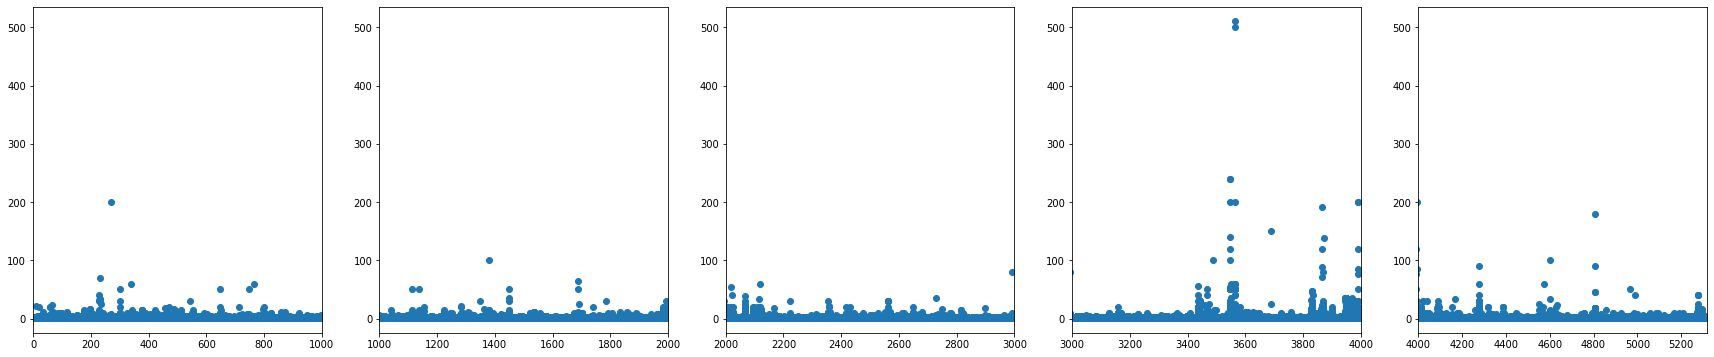

In [ ]:
plt.figure(figsize = (30,6))
plt.subplot(1,5,1)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(0, 1000)
plt.subplot(1,5,2)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(1000, 2000)
plt.subplot(1,5,3)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(2000, 3000)
plt.subplot(1,5,4)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(3000, 4000)
plt.subplot(1,5,5)
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')
plt.xlim(4000, march['ITEM_CD'].max())
plt.show()
# 주문 코드별 수량을 봤는데, 특정 주문 코드에서 주문이 폭발적으로 증가.
# 아마도 고객사와 연계하면 더 좋게 될지도? 
# 하지만 주문코드는 주문할 때마다 달라지지 않을까? 그러면 의미가 퇴색될 가능성이 높아질 것이다.

groupby 를 써서 휴일 / 평일 나눠서 eda를 해봅시다!

In [ ]:
march['BKG_DATE'].value_counts() # 적어도 3월엔 3개의 종류의 상품만 존재함.

20210323    29299
20210322    20724
20210303    12825
20210305    12225
20210329    11121
20210302    10996
20210331     9549
20210304     9510
20210316     9384
20210326     9135
20210324     8674
20210325     8632
20210328     8480
20210330     8250
20210314     7949
20210301     7893
20210321     7757
20210315     7302
20210327     7301
20210308     7110
20210311     6693
20210309     6598
20210317     6586
20210310     6304
20210319     6026
20210307     5970
20210318     5926
20210313     5552
20210312     5506
20210320     5476
20210306     5098
Name: BKG_DATE, dtype: int64

In [ ]:
march['BKG_DATE'].astype(str).str[6:].astype(int)

1          3
2          3
3          3
4          3
5          3
          ..
309344    31
309345    31
309346    31
309347    31
309348    31
Name: BKG_DATE, Length: 279851, dtype: int64

In [ ]:
march['day'].value_counts()

23    29299
22    20724
3     12825
5     12225
29    11121
2     10996
31     9549
4      9510
16     9384
26     9135
24     8674
25     8632
28     8480
30     8250
14     7949
1      7893
21     7757
15     7302
27     7301
8      7110
11     6693
9      6598
17     6586
10     6304
19     6026
7      5970
18     5926
13     5552
12     5506
20     5476
6      5098
Name: day, dtype: int64

In [ ]:
march['year'] = march['BKG_DATE'].astype(str).str[0:4].astype(int)
march['month'] = march['BKG_DATE'].astype(str).str[4:6].astype(int)
march['day'] = march['BKG_DATE'].astype(str).str[6:].astype(int)

In [ ]:
march['weekend'] = march['day'].apply(lambda x : 1 if x % 7 == 6 else (1 if x % 7 == 0 else 0))

In [ ]:
march['holiday'] = march['day'].apply(lambda x : 1 if x == 1 else 0)

In [ ]:
print(march['weekend'].value_counts())
print(march['holiday'].value_counts())

0    226268
1     53583
Name: weekend, dtype: int64
0    271958
1      7893
Name: holiday, dtype: int64


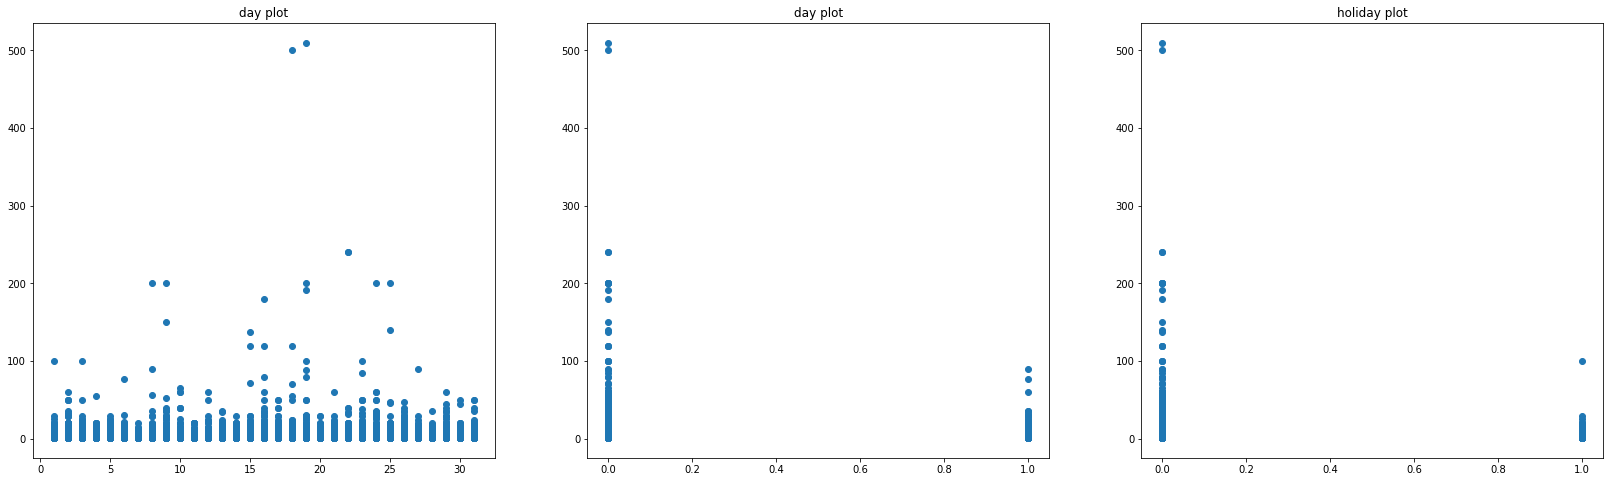

In [ ]:
plt.figure(figsize = (48,8))
plt.subplot(1,5,1)
plt.title('day plot')
plt.plot(march['day'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,2)
plt.title('day plot')
plt.plot(march['weekend'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,3)
plt.title('holiday plot')
plt.plot(march['holiday'], march['ITEM_QTY'], 'o')

In [ ]:
march.groupby('weekend').mean()

BKG_TYP      BKG_DATE      BKG_TIME  ...  3rd_week  4th_week  last_week
weekend                                       ...                               
0            7.0  2.021032e+07  94234.035997  ...  0.155674  0.337936   0.206335
1            7.0  2.021032e+07  97023.010843  ...  0.246963  0.294515   0.294515

[2 rows x 29 columns]

In [ ]:
march['monday'] = march['day'].apply(lambda x : 1 if x % 7 == 1 else 0)
march['tuesday'] = march['day'].apply(lambda x : 1 if x % 7 == 2 else 0)
march['wednesday'] = march['day'].apply(lambda x : 1 if x % 7 == 3 else 0)
march['thursday'] = march['day'].apply(lambda x : 1 if x % 7 == 4 else 0)
march['friday'] = march['day'].apply(lambda x : 1 if x % 7 == 5 else 0)
march['saturday'] = march['day'].apply(lambda x : 1 if x % 7 == 6 else 0)
march['sunday'] = march['day'].apply(lambda x : 1 if x % 7 == 0 else 0)

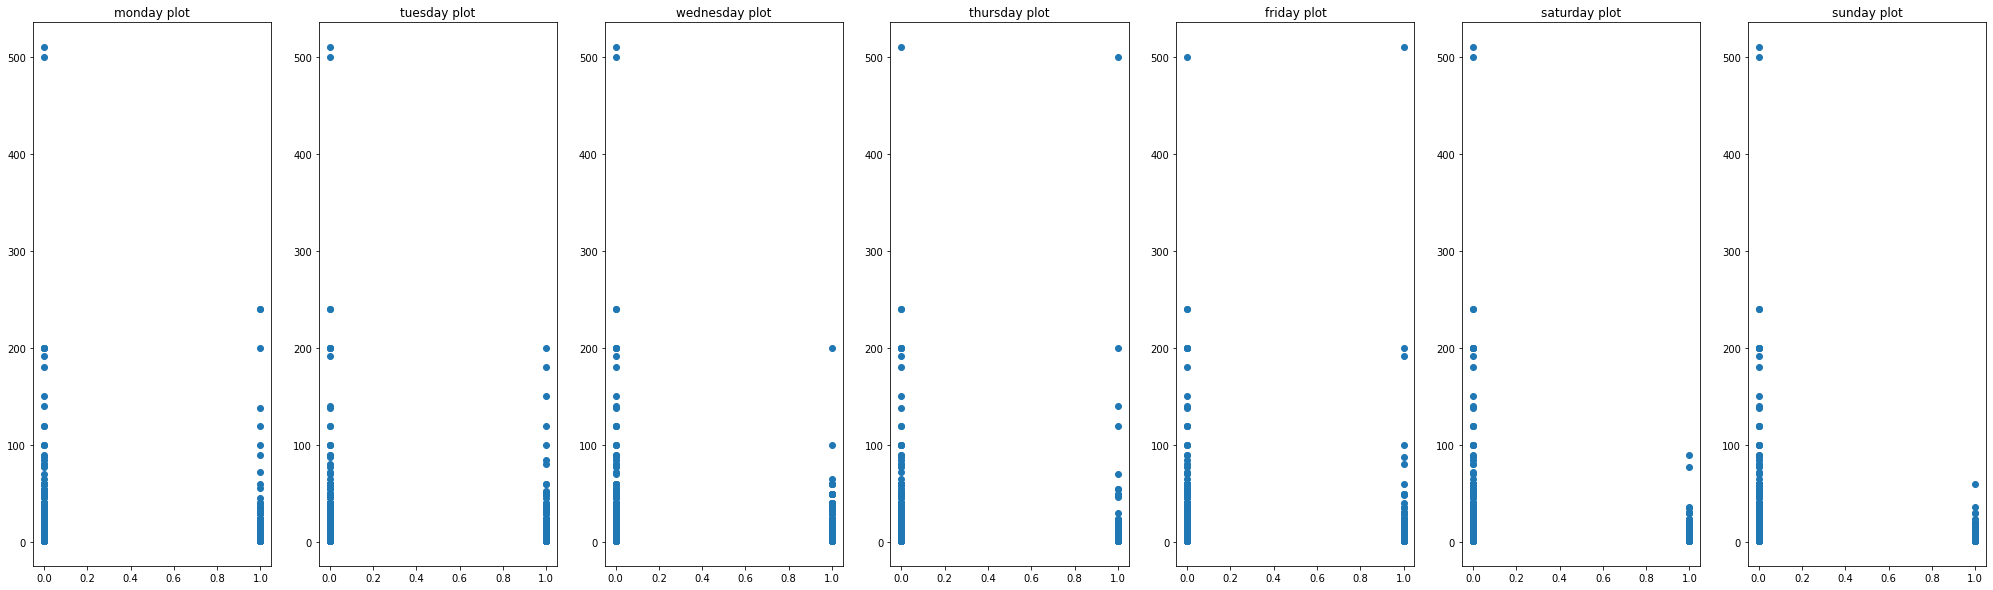

In [ ]:
plt.figure(figsize = (35,10))
plt.subplot(1,7,1)
plt.title('monday plot')
plt.plot(march['monday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,2)
plt.title('tuesday plot')
plt.plot(march['tuesday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,3)
plt.title('wednesday plot')
plt.plot(march['wednesday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,4)
plt.title('thursday plot')
plt.plot(march['thursday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,5)
plt.title('friday plot')
plt.plot(march['friday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,6)
plt.title('saturday plot')
plt.plot(march['saturday'], march['ITEM_QTY'], 'o')
plt.subplot(1,7,7)
plt.title('sunday plot')
plt.plot(march['sunday'], march['ITEM_QTY'], 'o')

In [ ]:
march['1st_week'] = march['day'].apply(lambda x : 1 if x <= 7 else 0)
march['2nd_week'] = march['day'].apply(lambda x : 1 if 8 <= x <= 14 else 0)
march['3rd_week'] = march['day'].apply(lambda x : 1 if 15 <= x <= 21 else 0)
march['4th_week'] = march['day'].apply(lambda x : 1 if 22 <= x <= 28 else 0)
march['last_week'] = march['day'].apply(lambda x : 1 if x >= 25 else 0)

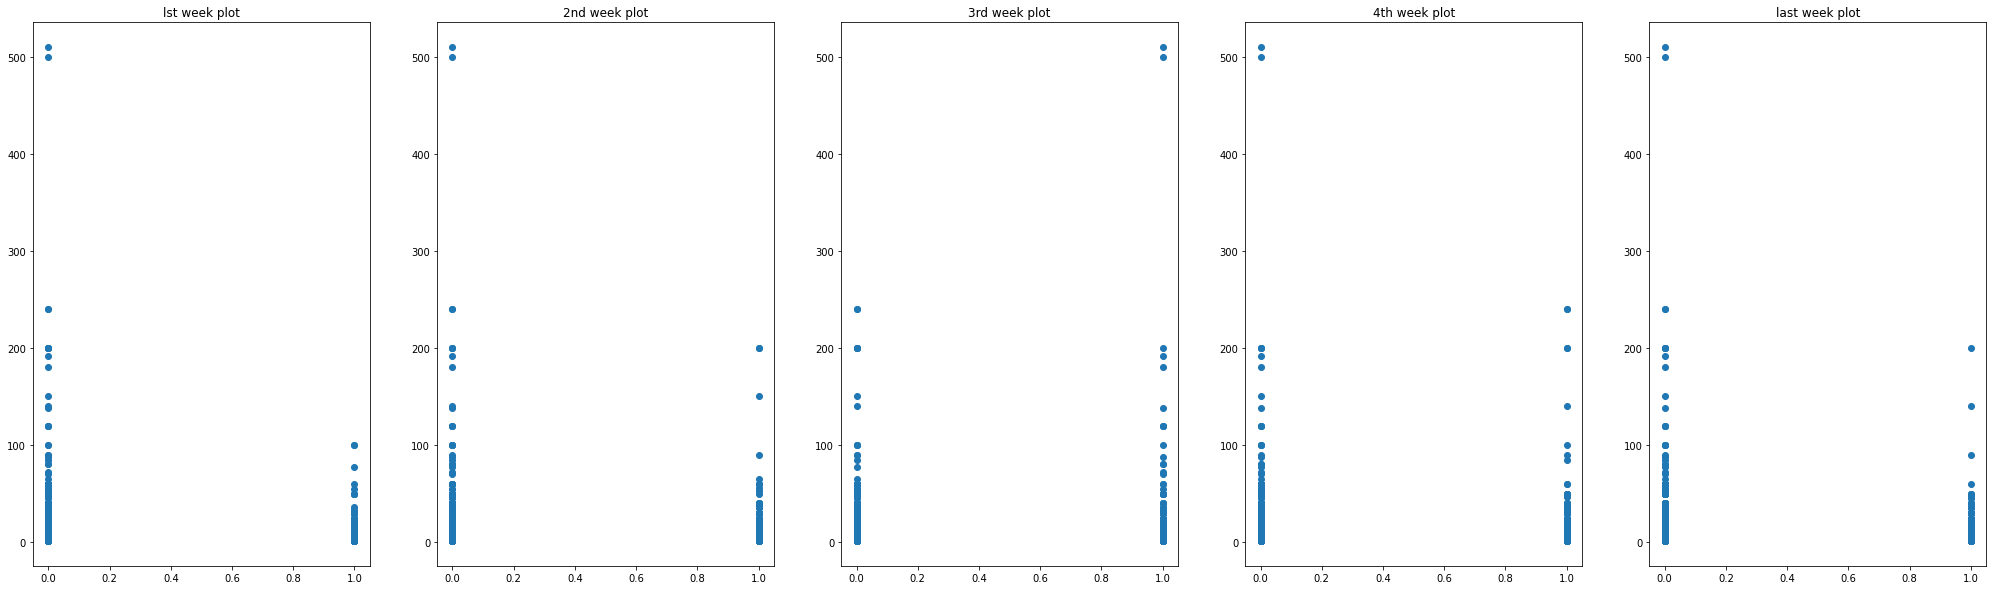

In [ ]:
plt.figure(figsize = (35,10))
plt.subplot(1,5,1)
plt.title('lst week plot')
plt.plot(march['1st_week'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,2)
plt.title('2nd week plot')
plt.plot(march['2nd_week'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,3)
plt.title('3rd week plot')
plt.plot(march['3rd_week'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,4)
plt.title('4th week plot')
plt.plot(march['4th_week'], march['ITEM_QTY'], 'o')
plt.subplot(1,5,5)
plt.title('last week plot')
plt.plot(march['last_week'], march['ITEM_QTY'], 'o')

# 쇼핑몰 코드 EDA

In [ ]:
L_encoder = LabelEncoder()
L_encoder.fit(df['INS_ID'])
df['INS_ID'] = L_encoder.transform(df['INS_ID'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['INS_ID'].value_counts()
# 뭐지? 했는데 iNEXBatch 말고는 전부 결측치떔에 날라감 ㅡㅡ;

1    1585496
0         28
Name: INS_ID, dtype: int64

In [ ]:
plt.plot(march['ITEM_CD'], march['ITEM_QTY'], 'o')